<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# Regularización, Regresión y Clasificación


En este ejercicio práctico se abordan los siguientes conceptos:
- Regularización Lasso y Ridge en modelos de regresión y clasificación.
- El parámetro C (inverso de la fuerza de regularización).
- Clasificación.
- Técnicas de validación cruzada (por ejemplo, stratified k-folds).
- Métricas de clasificación: F1-score, matriz de confusión, classification report, accuracy, recall.

El dataset a utilizar es el **Forest Covertypes** de scikit-learn.  
Para más información consulta:  
[Forest Covertypes dataset](https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes)  
[fetch_covtype documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)



## Instrucciones

1. **Carga y Preprocesamiento:**  
   - Cargar el dataset Forest Covertypes utilizando `sklearn.datasets.fetch_covtype`.
   - Realizar un análisis exploratorio y dividir el dataset en conjuntos de entrenamiento y prueba.
   - (Opcional) Estandarizar los predictores, ya que las técnicas de regularización son sensibles a la escala.

2. **Modelos de Regresión Regularizada:**  
   - Implementa modelos de regresión Ridge y Lasso sobre un problema de regresión (puedes transformar el problema en uno binario o utilizar un subconjunto).
   - Analiza el efecto del parámetro de regularización λ (alpha) sobre la magnitud de los coeficientes.

3. **Modelo de Clasificación:**  
   - Implementa un modelo de regresión logística regularizada (puedes utilizar L1 o L2) para clasificar el dataset original.
   - Interpreta los coeficientes obtenidos, considerando la relación entre los predictores y la variable respuesta.

4. **Validación Cruzada:**  
   - Utiliza Stratified K-Folds (por ejemplo, 5 folds) para evaluar el desempeño del modelo de clasificación.
   - Calcula las métricas (accuracy, recall, F1-score, matriz de confusión y classification report) tanto en validación cruzada como en el conjunto de prueba.

5. **Comentarios y Explicaciones:**  
   - Cada bloque de código debe incluir comentarios explicativos y, cuando sea necesario, fórmulas en los bloques Markdown por ejemplo, la fórmula del F1-score:  
     $$
     F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
     $$.

----------

A continuación, se muestra el código base:


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Cargar el dataset Forest Covertypes

In [14]:
data = fetch_covtype()
X = data.data
y = data.target

## Paso 1: Análisis Exploratorio y Preprocesamiento

Realice un análisis exploratorio riguroso del dataset. Se recomienda:

- Convertir el dataset a un `DataFrame` de pandas y visualizar las primeras filas usando `.head()`.
- Revisar las dimensiones del DataFrame (número de filas y columnas) con `.shape`.
- Verificar la tipología de las variables, determinando cuántas son numéricas y cuántas son categóricas.
- Comprobar si existen valores nulos en cada columna.
- Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas.
- Realizar un análisis univariado mediante histogramas, boxplots y scatterplots (comparando cada variable numérica con la variable objetivo).
- Analizar la distribución de la variable objetivo mediante `value_counts()` y gráficos, para detectar posibles desbalances en el dataset.
- Aplicar técnicas de normalización/estandarización (por ejemplo, Z-Score con StandardScaler y Min-Max Scaling) sobre los predictores.

Este análisis exploratorio (EDA) es fundamental para entender la estructura y calidad del dataset antes de proceder con el modelado.


# Preprocesamiento

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Convertir el dataset a DataFrame

In [19]:
df = pd.DataFrame(X, columns=data.feature_names if hasattr(data, 'feature_names') 
                else [f"Feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Visualizar las primeras filas y dimensiones del DataFrame

In [8]:
#TU CODIGO VA AQUI

Primeras filas del DataFrame:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [7]:
# VERFICIDAR DIMENSIONES DEL DATAFRAME
#TU CODIGO VA AQUI




Dimensiones del DataFrame: (581012, 55)


# Revisar la tipología de variables

In [21]:
#TU CODIGO VA AQUI


# Verificar valores nulos en el DataFrame


In [22]:
#TU CODIGO VA AQUI


# Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas

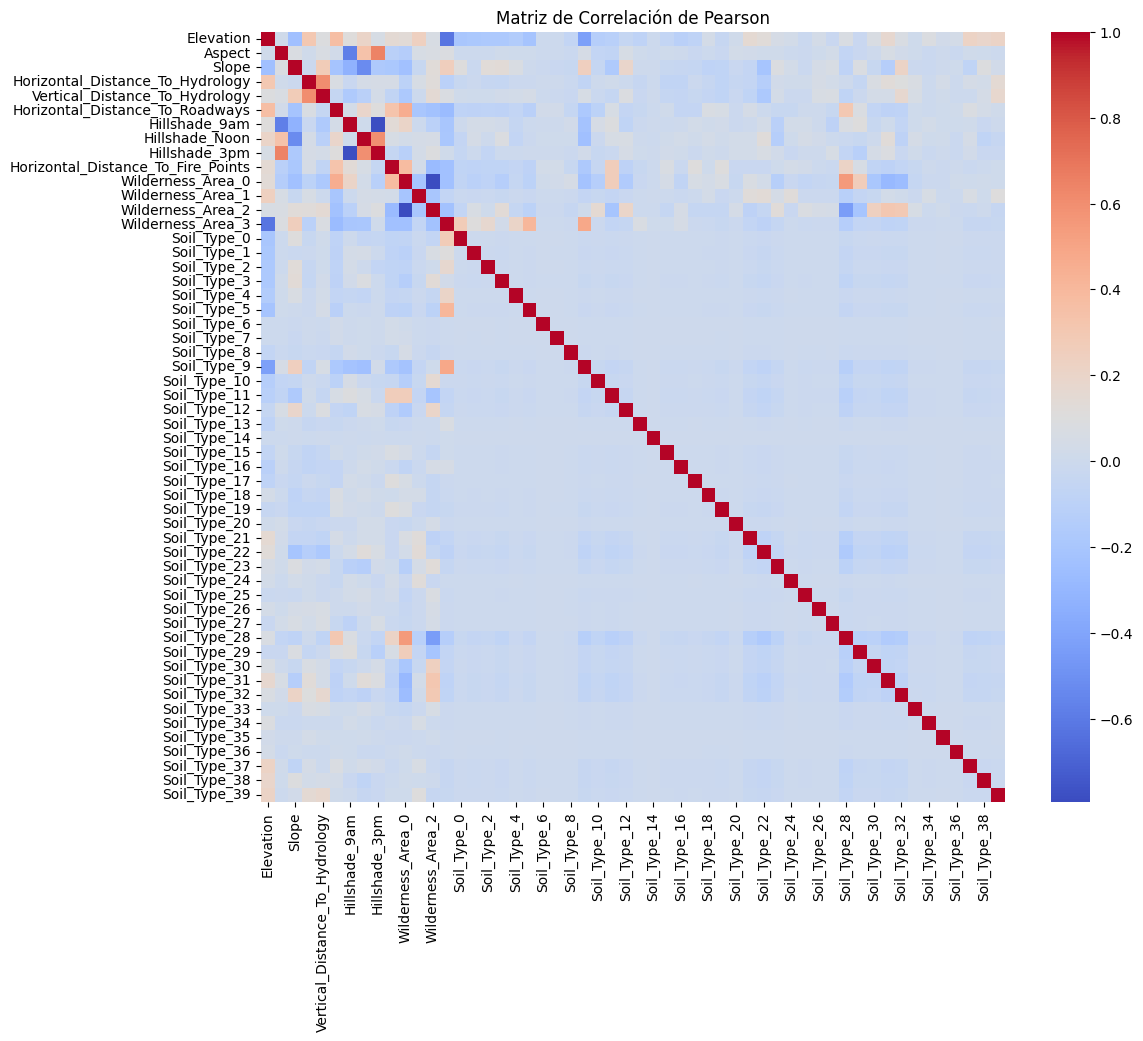

In [23]:
corr_matrix = df[num_vars].corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de Correlación de Pearson")
plt.show()

# Que podemos decir de esta matriz de correlación?

# Análisis bivariado respecto a la variable objetivo

verifica la distribución de las clases

Es un problema balanceado?

In [26]:
#TU CODIGO VA AQUI


# Dividir el DataFrame en conjuntos de entrenamiento y prueba (70%-30%) manteniendo la estratificación

In [11]:
#TU CODIGO VA AQUI


Dimensiones del conjunto de entrenamiento: (406708, 54)
Dimensiones del conjunto de prueba: (174304, 54)


# Aplicar normalización: StandardScaler (Z-Score) y Min-Max Scaling

Ajustar y transformar el conjunto de entrenamiento

In [13]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
#TU CODIGO VA AQUI




# Transformar el conjunto de prueba

In [14]:
#TU CODIGO VA AQUI



## Paso 2: Modelos de Regresión Regularizada

Ahora que se ha realizado un análisis exploratorio completo y se han generado conjuntos de entrenamiento y prueba con datos escalados, en este paso implementaremos modelos de regresión regularizada (Ridge y Lasso) sobre un problema simplificado.

**Objetivo:**  
- Seleccionar un subconjunto de predictores (por ejemplo, las primeras 5 columnas) y transformar la variable objetivo en un problema binario.  
- Utilizar los datos escalados (por ejemplo, el conjunto obtenido con StandardScaler) para ajustar modelos Ridge y Lasso.  
- Comparar el efecto del parámetro de regularización (alpha) sobre los coeficientes.

*Pistas:*  
- Transforme la variable target a binario, por ejemplo: asignar 1 si el valor es mayor que un umbral (p. ej., 2) y 0 en caso contrario.  
- Observe cómo varían los coeficientes al modificar el parámetro alpha.
  
_Función objetivo de Ridge:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} \beta_j^2
$$
_Función objetivo de Lasso:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} |\beta_j|
$$


In [25]:
# Seleccionar las primeras 5 variables del conjunto escalado y transformar la variable target
#debes convertir la variable objetivo a una variable binaria
#si es mayor que 2        => 1
# si es menor o igual a 2 = > 0
#TU CODIGO VA AQUI


# Modelo Ridge

In [17]:
ridge_model = Ridge(alpha=1.0)  # Ajuste con alpha = 1.0 (puede variar este parámetro)
#TU CODIGO VA AQUI

#tome nora de sus observaciones

Coeficientes Ridge: [-0.14749998  0.01096182  0.03756682 -0.00143453  0.03491748]


# Modelo Lasso

In [18]:
lasso_model = Lasso(alpha=0.1)  # Ajuste con alpha = 0.1 (puede variar este parámetro)
#TU CODIGO VA AQUI

#tome nora de sus observaciones

Coeficientes Lasso: [-0.05356982  0.          0.         -0.          0.        ]


## Paso 3: Modelo de Clasificación - Regresión Logística Regularizada

En este paso se construirá un modelo de clasificación utilizando regresión logística regularizada. Aproveche los datos escalados obtenidos en el Paso 1.

**Objetivo:**  
- Ajustar un modelo de regresión logística (utilizando penalización L2 o L1) con el conjunto de entrenamiento completo.  
- Interpretar los coeficientes obtenidos, considerando que el parámetro C (inverso de la fuerza de regularización) controla la penalización: valores pequeños de C implican penalización fuerte, mientras que valores mayores permiten mayor flexibilidad.

*Pista:*  
- Use la versión estandarizada del conjunto de entrenamiento (X_train_std) para asegurar que la regularización actúe de manera equitativa en todos los predictores.


In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
#TU CODIGO VA AQUI


#tome nora de sus observaciones

## Paso 4: Validación Cruzada

Utilice la técnica de validación cruzada con Stratified K-Folds para evaluar el desempeño del modelo de clasificación ajustado.

**Objetivo:**  
- Configurar una validación cruzada con 5 folds, que preserve la distribución de la variable objetivo.  
- Obtener predicciones a través de `cross_val_predict` y calcular las métricas: accuracy, recall, F1-score, matriz de confusión y classification report.

*Pista:*  
- Asegúrese de utilizar el conjunto de entrenamiento estandarizado (X_train_std) y la variable objetivo (y_train).

# Validación Cruzada con StratifiedKFold (opcional Toma tiempo)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
#TU CODIGO VA AQUI



#CUAL ES EL RENDIMIENTO ESPERADO EN EL CONJUNTO DE PRUEBA??


## Paso 5: Evaluación del Modelo en el Conjunto de Prueba

Utilice el modelo de regresión logística entrenado en el Paso 3 para verificar su estimación y realizar predicciones sobre el conjunto de prueba escalado.

**Objetivo:**  
- Calcular y visualizar las métricas de evaluación: accuracy, recall (macro), F1-score (macro), matriz de confusión y classification report.
- Compare los resultados obtenidos en el conjunto de prueba con los de la validación cruzada.

*Pista:*  
- Emplee las funciones `accuracy_score`, `recall_score`, `f1_score`, `confusion_matrix` y `classification_report` de scikit-learn.

In [ ]:
#TU CODIGO VA AQUI


# Evaluación en el conjunto de prueba

# Compara  con otros modelos

utiliza random forest y XGBoost para seleccion de caracteristicas, y realiza un reporte comparando el rendimiento de diferenes clasificadores empleando los subconjuntos de carácteristicas seleccionados por estos modelos:


Primeras filas del dataset generado:
       edad  horas_entrenamiento  nivel_tecnico  experiencia_competencia  \
0 -1.023683            -0.338038       0.095223                 0.909996   
1 -0.072434            -1.343255      -1.573744                -0.503298   
2  0.652927             0.952030      -0.651159                 0.649276   
3 -0.090342             0.416601      -2.554622                -1.223006   
4 -0.928448             0.633686      -2.860930                -0.621349   

   color_uniforme  dia_nacimiento  mes_nacimiento  ganador_medalla  
0       -0.575858       -0.393553       -0.741334                0  
1       -2.479424       -0.850589        0.355713                0  
2        1.016390        2.349099       -0.390819                1  
3       -1.544572       -0.771141       -0.827738                0  
4       -2.183616       -1.454789        0.069261                0  


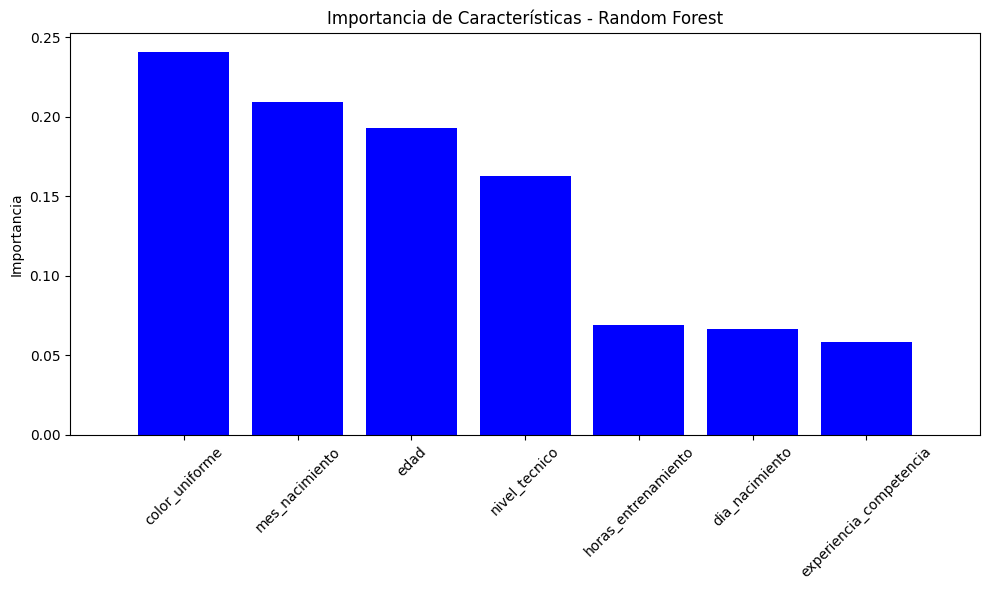

C:\Users\16079220\AppData\Local\anaconda3\envs\bancow2\lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


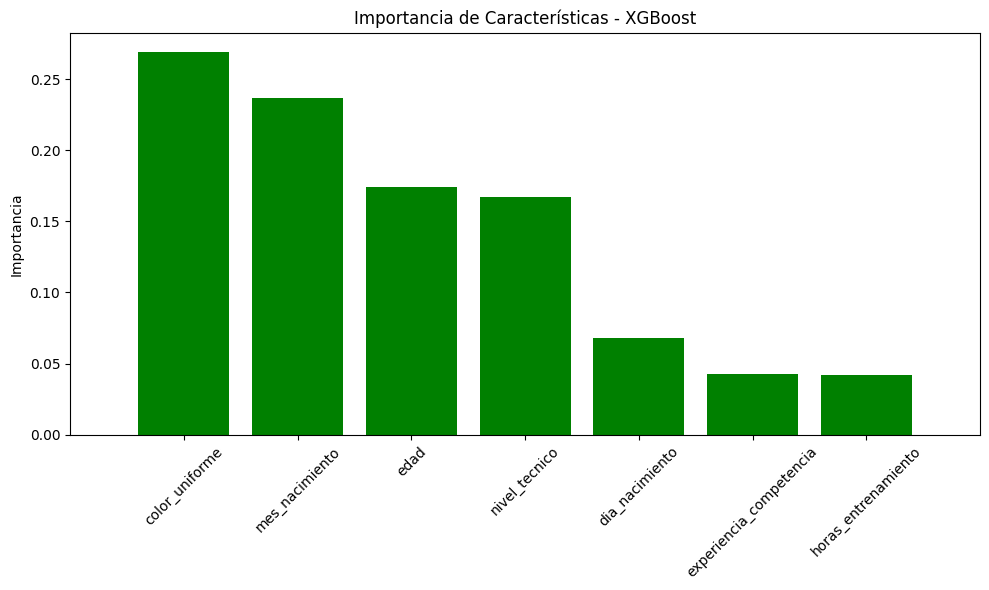


Comparación de importancia de características:
            Característica  Importancia RF  Importancia XGB  \
4           color_uniforme        0.240804         0.269222   
6           mes_nacimiento        0.209479         0.236515   
0                     edad        0.192915         0.174323   
2            nivel_tecnico        0.162824         0.167297   
5           dia_nacimiento        0.066371         0.067885   
1      horas_entrenamiento        0.069280         0.042218   
3  experiencia_competencia        0.058326         0.042540   

   Importancia_promedio  
4              0.255013  
6              0.222997  
0              0.183619  
2              0.165061  
5              0.067128  
1              0.055749  
3              0.050433  

Accuracy con 7 características (Random Forest (todas)): 0.9433
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia', 'color_uniforme', 'dia_nacimiento', 'mes_nacimiento']

Accuracy con 7 carac

C:\Users\16079220\AppData\Local\anaconda3\envs\bancow2\lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy con 4 características (Random Forest (solo relevantes)): 0.8667
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia']

Accuracy con 4 características (XGBoost (solo relevantes)): 0.8367
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia']


C:\Users\16079220\AppData\Local\anaconda3\envs\bancow2\lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy con 4 características (Random Forest (top 4 RF)): 0.9500
Características usadas: ['color_uniforme', 'mes_nacimiento', 'edad', 'nivel_tecnico']

Accuracy con 4 características (XGBoost (top 4 XGB)): 0.9567
Características usadas: ['color_uniforme', 'mes_nacimiento', 'edad', 'nivel_tecnico']


C:\Users\16079220\AppData\Local\anaconda3\envs\bancow2\lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 1. Generación del dataset artificial
np.random.seed(42)

# Crear dataset con 4 características relevantes y 3 irrelevantes
X, y = make_classification(
    n_samples=1000,
    n_features=7,  # 4 relevantes + 3 irrelevantes
    n_informative=4,  # Características relevantes
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.8, 0.2],  # 80% clase 0, 20% clase 1
    random_state=42
)

# Crear DataFrame con nombres descriptivos
feature_names = [
    'edad',  # Relevante 1
    'horas_entrenamiento',  # Relevante 2
    'nivel_tecnico',  # Relevante 3
    'experiencia_competencia',  # Relevante 4
    'color_uniforme',  # Irrelevante 1
    'dia_nacimiento',  # Irrelevante 2
    'mes_nacimiento'  # Irrelevante 3
]

df = pd.DataFrame(X, columns=feature_names)
df['ganador_medalla'] = y  # Variable objetivo (1=ganó medalla, 0=no ganó)

# Ver las primeras filas del dataset
print("Primeras filas del dataset generado:")
print(df.head())

# 2. Análisis de importancia con Random Forest

# Dividir datos
X = df.drop('ganador_medalla', axis=1)
y = df['ganador_medalla']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancia de características
importancias_rf = rf.feature_importances_
indices_rf = np.argsort(importancias_rf)[::-1]

# Visualizar
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importancias_rf[indices_rf], color='b', align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices_rf], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

# 3. Análisis de importancia con XGBoost

# Entrenar XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Obtener importancia de características
importancias_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importancias_xgb)[::-1]

# Visualizar
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - XGBoost")
plt.bar(range(X.shape[1]), importancias_xgb[indices_xgb], color='g', align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices_xgb], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

# 4. Comparación de resultados

# Crear DataFrame comparativo
resultados = pd.DataFrame({
    'Característica': feature_names,
    'Importancia RF': importancias_rf,
    'Importancia XGB': importancias_xgb
})

# Ordenar por importancia promedio
resultados['Importancia_promedio'] = (resultados['Importancia RF'] + resultados['Importancia XGB']) / 2
resultados = resultados.sort_values('Importancia_promedio', ascending=False)

print("\nComparación de importancia de características:")
print(resultados[['Característica', 'Importancia RF', 'Importancia XGB', 'Importancia_promedio']])

# 5. Evaluación con subconjuntos de características

def evaluar_modelo(caracteristicas, modelo, modelo_nombre):
    X_train_sub = X_train[caracteristicas]
    X_test_sub = X_test[caracteristicas]
    
    modelo.fit(X_train_sub, y_train)
    pred = modelo.predict(X_test_sub)
    accuracy = accuracy_score(y_test, pred)
    
    print(f"\nAccuracy con {len(caracteristicas)} características ({modelo_nombre}): {accuracy:.4f}")
    print("Características usadas:", caracteristicas)

# Evaluar con todas las características
evaluar_modelo(feature_names, rf, "Random Forest (todas)")
evaluar_modelo(feature_names, xgb, "XGBoost (todas)")

# Evaluar solo con características relevantes (las 4 primeras según nuestro diseño)
caracteristicas_relevantes = feature_names[:4]
evaluar_modelo(caracteristicas_relevantes, rf, "Random Forest (solo relevantes)")
evaluar_modelo(caracteristicas_relevantes, xgb, "XGBoost (solo relevantes)")

# Evaluar con características seleccionadas por importancia (top 4)
top_4_rf = [feature_names[i] for i in indices_rf[:4]]
top_4_xgb = [feature_names[i] for i in indices_xgb[:4]]

evaluar_modelo(top_4_rf, rf, "Random Forest (top 4 RF)")
evaluar_modelo(top_4_xgb, xgb, "XGBoost (top 4 XGB)")

# Conclusiones

Agrega las conclusiones más relevantes del análisis realizado y los resultados obtenidos.

- Conclusión 1
- Conclusión 2
- Conclusión 3
